In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Wear time analysis (Device)

In [2]:
weartime = pd.read_csv('WearTimes_Device.csv',header=[0,1])

In [3]:
weartime.head(3)

Unnamed: 0_level_0      CBR11                             CBR14             \
                Days SCO-Device CBR-Device KAFO-Device SCO-Device CBR-Device   
0                  1       86.7       71.2        83.2       33.5       27.8   
1                  2       20.4        1.7        12.9        0.0        0.0   
2                  3        0.0       53.4         NaN        0.0        0.0   

                   CBR15                            ...           CBR27  \
  KAFO-Device SCO-Device CBR-Device KAFO-Device     ...     KAFO-Device   
0         NaN       56.2       86.2        89.5     ...            82.7   
1         NaN       47.5       61.8        58.4     ...            49.1   
2         NaN       53.1       51.4        59.0     ...            63.5   

       CBR28                             CBR30                         \
  SCO-Device CBR-Device KAFO-Device SCO-Device CBR-Device KAFO-Device   
0       44.9       39.2        20.2       89.5      100.0       100.0   
1        0.0        5.8         8.3       65.5       75.1        68.8   
2        6.5        0.0        11.9       71.2        2.3        68.3   

       CBR31                         
  SCO-Device CBR-Device KAFO-Device  
0        NaN       93.8        86.7  
1        NaN       64.9        55.7  
2        NaN       70.3        51.6  

[3 rows x 43 columns]

In [4]:
weartime = weartime.drop('Unnamed: 0_level_0',axis=1)

/Users/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  if __name__ == '__main__':


In [5]:
weartime.head(4)

CBR11                             CBR14                         \
  SCO-Device CBR-Device KAFO-Device SCO-Device CBR-Device KAFO-Device   
0       86.7       71.2        83.2       33.5       27.8         NaN   
1       20.4        1.7        12.9        0.0        0.0         NaN   
2        0.0       53.4         NaN        0.0        0.0         NaN   
3        0.0       40.8         NaN        0.0        0.0         NaN   

       CBR15                             CBR16     ...           CBR27  \
  SCO-Device CBR-Device KAFO-Device SCO-Device     ...     KAFO-Device   
0       56.2       86.2        89.5       69.7     ...            82.7   
1       47.5       61.8        58.4       32.0     ...            49.1   
2       53.1       51.4        59.0       27.3     ...            63.5   
3       45.0       49.8        53.9       50.8     ...            65.0   

       CBR28                             CBR30                         \
  SCO-Device CBR-Device KAFO-Device SCO-Device CBR-Device KAFO-Device   
0       44.9       39.2        20.2       89.5      100.0       100.0   
1        0.0        5.8         8.3       65.5       75.1        68.8   
2        6.5        0.0        11.9       71.2        2.3        68.3   
3        1.3        0.0         1.2       31.7        0.0        63.2   

       CBR31                         
  SCO-Device CBR-Device KAFO-Device  
0        NaN       93.8        86.7  
1        NaN       64.9        55.7  
2        NaN       70.3        51.6  
3        NaN       59.2        42.1  

[4 rows x 42 columns]

In [6]:
weartime.columns

MultiIndex(levels=[[u'CBR11', u'CBR14', u'CBR15', u'CBR16', u'CBR19', u'CBR21', u'CBR22', u'CBR24', u'CBR25', u'CBR26', u'CBR27', u'CBR28', u'CBR30', u'CBR31', u'Unnamed: 0_level_0'], [u'CBR-Device', u'Days', u'KAFO-Device', u'SCO-Device']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 9, 9, 9, 8, 8, 8, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13], [3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2]])

In [7]:
weartime = weartime.T

In [8]:
weartime.head(6)

0     1     2     3     4     5     6     7     8     9   \
CBR11 SCO-Device   86.7  20.4   0.0   0.0   0.0   0.0   0.0   0.0  12.2   0.0   
      CBR-Device   71.2   1.7  53.4  40.8  60.2  50.4  46.5  31.1  35.4  80.0   
      KAFO-Device  83.2  12.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
CBR14 SCO-Device   33.5   0.0   0.0   0.0   0.0  14.2   0.0   0.0   0.0   0.0   
      CBR-Device   27.8   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      KAFO-Device   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                  ...    26    27    28  29  30  31  32  33  34  35  
CBR11 SCO-Device  ...   5.4   NaN   NaN NaN NaN NaN NaN NaN NaN NaN  
      CBR-Device  ...  53.3  18.3  15.8 NaN NaN NaN NaN NaN NaN NaN  
      KAFO-Device ...   NaN   NaN   NaN NaN NaN NaN NaN NaN NaN NaN  
CBR14 SCO-Device  ...   NaN   NaN   NaN NaN NaN NaN NaN NaN NaN NaN  
      CBR-Device  ...   NaN   NaN   NaN NaN NaN NaN NaN NaN NaN NaN  
      KAFO-Device ...   NaN   NaN   NaN NaN NaN NaN NaN NaN NaN NaN  

[6 rows x 36 columns]

In [9]:
SCO = weartime.iloc[0::3]
SCO = SCO.drop(SCO.columns[0], axis=1) #drop day 0 (lab)
SCO.head(4)

,,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
CBR11,SCO-Device,20.4,0.0,0.0,0.0,0.0,0.0,0.0,12.2,0.0,21.7,...,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBR14,SCO-Device,0.0,0.0,0.0,0.0,14.2,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBR15,SCO-Device,47.5,53.1,45.0,51.6,50.4,50.4,54.4,52.0,48.6,55.9,...,48.0,49.8,47.9,49.7,46.7,83.1,NaN,NaN,NaN,NaN
CBR16,SCO-Device,32.0,27.3,50.8,35.5,38.6,42.8,48.3,54.7,42.7,56.4,...,22.9,40.9,41.2,31.4,35.8,20.1,41.4,NaN,NaN,NaN


In [10]:
CBR = weartime.iloc[1::3]
CBR = CBR.drop(CBR.columns[0],axis=1)
CBR.head(4)

,,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
CBR11,CBR-Device,1.7,53.4,40.8,60.2,50.4,46.5,31.1,35.4,80.0,68.3,...,53.3,18.3,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBR14,CBR-Device,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBR15,CBR-Device,61.8,51.4,49.8,31.9,51.5,53.7,52.7,55.1,44.9,54.4,...,56.8,46.8,31.3,61.4,59.2,52.8,53.6,64.4,NaN,NaN
CBR16,CBR-Device,0.0,42.0,53.1,39.4,40.8,34.7,52.8,48.9,36.0,21.8,...,67.2,86.3,60.5,84.0,62.5,88.8,NaN,NaN,NaN,NaN


In [11]:
KAFO = weartime.iloc[2::3]
KAFO = KAFO.drop(KAFO.columns[0],axis=1)
KAFO.head(4)

,,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
CBR11,KAFO-Device,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBR14,KAFO-Device,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBR15,KAFO-Device,58.4,59.0,53.9,46.1,40.2,57.6,59.3,44.7,56.5,28.2,...,43.5,41.0,61.0,54.9,47.1,41.0,46.1,22.4,NaN,NaN
CBR16,KAFO-Device,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
weartime.head()

0     1     2     3     4     5     6     7     8     9   \
CBR11 SCO-Device   86.7  20.4   0.0   0.0   0.0   0.0   0.0   0.0  12.2   0.0   
      CBR-Device   71.2   1.7  53.4  40.8  60.2  50.4  46.5  31.1  35.4  80.0   
      KAFO-Device  83.2  12.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
CBR14 SCO-Device   33.5   0.0   0.0   0.0   0.0  14.2   0.0   0.0   0.0   0.0   
      CBR-Device   27.8   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                  ...    26    27    28  29  30  31  32  33  34  35  
CBR11 SCO-Device  ...   5.4   NaN   NaN NaN NaN NaN NaN NaN NaN NaN  
      CBR-Device  ...  53.3  18.3  15.8 NaN NaN NaN NaN NaN NaN NaN  
      KAFO-Device ...   NaN   NaN   NaN NaN NaN NaN NaN NaN NaN NaN  
CBR14 SCO-Device  ...   NaN   NaN   NaN NaN NaN NaN NaN NaN NaN NaN  
      CBR-Device  ...   NaN   NaN   NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 36 columns]

In [13]:
SCO = SCO.T

In [14]:
SCO.columns = SCO.columns.droplevel(level=1)

In [15]:
SCO.columns

Index([u'CBR11', u'CBR14', u'CBR15', u'CBR16', u'CBR19', u'CBR21', u'CBR22',
       u'CBR24', u'CBR26', u'CBR25', u'CBR27', u'CBR28', u'CBR30', u'CBR31'],
      dtype='object')

In [16]:
SCO.head(4)

,CBR11,CBR14,CBR15,CBR16,CBR19,CBR21,CBR22,CBR24,CBR26,CBR25,CBR27,CBR28,CBR30,CBR31
1,20.4,0.0,47.5,32.0,0.0,19.5,0.0,16.4,29.7,NaN,0.0,0.0,65.5,NaN
2,0.0,0.0,53.1,27.3,16.3,3.8,0.0,22.4,17.4,NaN,0.6,6.5,71.2,NaN
3,0.0,0.0,45.0,50.8,0.0,11.8,17.2,22.9,15.8,NaN,10.9,1.3,31.7,NaN
4,0.0,0.0,51.6,35.5,16.5,13.5,0.0,0.0,34.7,NaN,4.9,0.0,69.9,NaN


In [17]:
CBR = CBR.T
CBR.columns = CBR.columns.droplevel(level=1)
CBR.head(4)

,CBR11,CBR14,CBR15,CBR16,CBR19,CBR21,CBR22,CBR24,CBR26,CBR25,CBR27,CBR28,CBR30,CBR31
1,1.7,0.0,61.8,0.0,0.0,0.0,24.7,17.6,4.8,26.0,0.0,5.8,75.1,64.9
2,53.4,0.0,51.4,42.0,6.0,0.0,29.3,0.2,0.0,31.4,0.0,0.0,2.3,70.3
3,40.8,0.0,49.8,53.1,7.2,3.8,34.0,15.4,7.3,39.7,0.0,0.0,0.0,59.2
4,60.2,0.0,31.9,39.4,7.2,2.6,4.9,0.0,13.1,5.1,0.0,0.0,1.0,61.3


In [18]:
KAFO = KAFO.T
KAFO.columns = KAFO.columns.droplevel(level=1)
KAFO.head(4)

,CBR11,CBR14,CBR15,CBR16,CBR19,CBR21,CBR22,CBR24,CBR26,CBR25,CBR27,CBR28,CBR30,CBR31
1,12.9,NaN,58.4,NaN,NaN,42.2,0.4,49.9,46.9,57.5,49.1,8.3,68.8,55.7
2,NaN,NaN,59.0,NaN,NaN,57.4,32.1,54.6,73.6,57.2,63.5,11.9,68.3,51.6
3,NaN,NaN,53.9,NaN,NaN,47.2,0.0,65.4,59.7,52.6,65.0,1.2,63.2,42.1
4,NaN,NaN,46.1,NaN,NaN,62.1,24.0,31.8,46.5,57.8,54.4,0.0,57.6,59.4


# Wear time analysis - Device Actigraph
Subjects without KAFO data have the SCO as baseline device

In [19]:
weartimes = pd.read_excel('./WearTime_Device_Formatted.xlsx')

In [20]:
weartimes.head(4)

,Days,SubjID,Condition,Wear Time
0,1,CBR11,SCO-Device,86.7
1,2,CBR11,SCO-Device,20.4
2,3,CBR11,SCO-Device,0.0
3,4,CBR11,SCO-Device,0.0


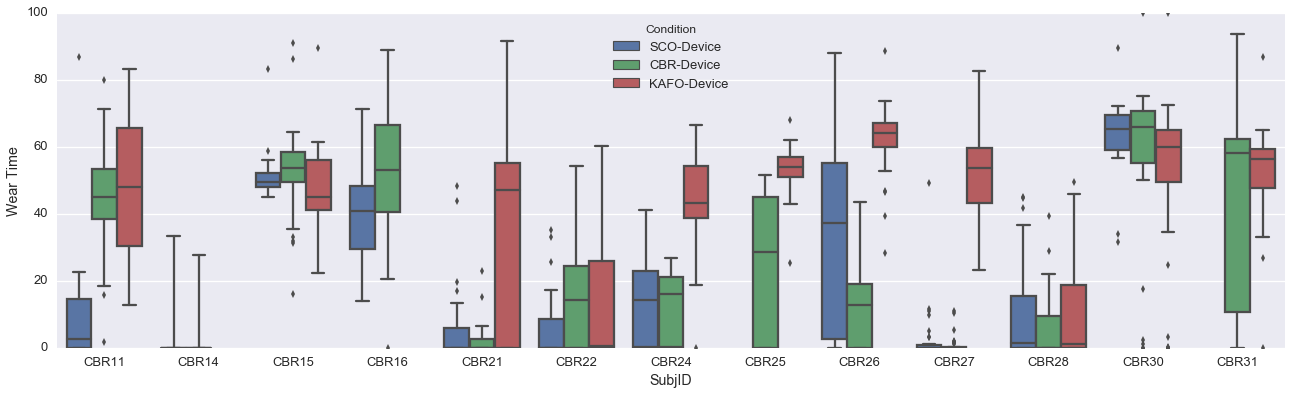

In [21]:
sns.set_context('talk')
fig = plt.figure(figsize=(22,6))
sns.boxplot(data=weartimes,x='SubjID',y='Wear Time',hue='Condition')

Most subjects had a median daily KAFO wear time above 40% (baseline). Most People who wore either the CBR or the SCO for more than 40% of the day has a comparable wear time with their baseline device (KAFO), thus suggesting that they used the CBR at least as much as their baselined device (CBR11,16,30,31). Others show a trend where the baseline device is used significantly more than either the SCO or the CBR (21,24,25,26,27). Need to include subject 14 data.

** Note that wear time includes both sitting and mobility**

## Wear time and Daily Steps (Device)

In [22]:
Steps = pd.read_csv('./Summary Steps.csv')
print len(Steps)
Steps.head()

1518


,Subject,SubjID,Brace,Actigraph,Date,Day of Week,Day of Week Num,Steps Counts,Steps Per Minute
0,CBR11_home_cbrace_device,11,CBR,Device,NaN,Wednesday,3,646,1.2
1,CBR11_home_cbrace_device,11,CBR,Device,NaN,Thursday,4,1710,5.3
2,CBR11_home_cbrace_device,11,CBR,Device,NaN,Friday,5,1020,2.5
3,CBR11_home_cbrace_device,11,CBR,Device,NaN,Saturday,6,1357,2.1
4,CBR11_home_cbrace_device,11,CBR,Device,NaN,Sunday,7,1665,3.3


In [23]:
Steps[Steps.SubjID==11].Brace.unique()

array(['CBR', 'KAFO', 'SCO'], dtype=object)

In [24]:
Steps[Steps.SubjID==16].Brace.unique()

array(['CBR', 'SCO'], dtype=object)

In [25]:
#remove Waist data
Steps = Steps[Steps.Actigraph!='Waist']

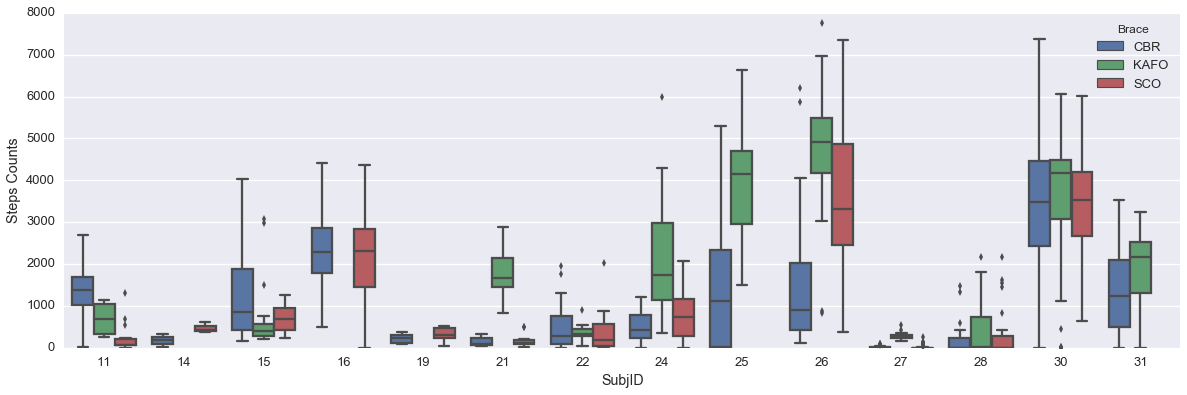

In [26]:
sns.set_context('talk')
fig = plt.figure(figsize=(20,6))
ax = sns.boxplot(x='SubjID',y='Steps Counts',hue='Brace',data=Steps)
# ax = sns.swarmplot(x='SubjID',y='Steps Counts',hue='Brace',data=Steps)

The trend suggests that most participants did take more steps with their baseline device than with the CBR. Exceptions incude 11,16 who seemed to take approximately equal number of steps aross the 2 devices. 

CBR27 seemed to take very few steps with either brace (although KAFO wear time is above 40%).

Missing data to include:
* CBR14 KAFO
* CBR31 SCO 


**6 participants (11,16,25,26,30,31) have a median # of steps > 1000. All others have medians between 0 and 500**

(-2, 20)

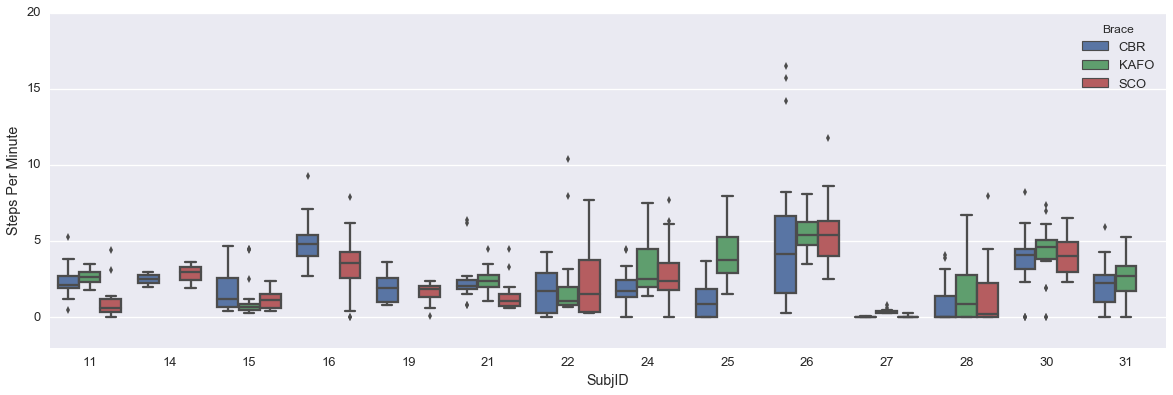

In [27]:
fig = plt.figure(figsize=(20,6))
ax = sns.boxplot(x='SubjID',y='Steps Per Minute',hue='Brace',data=Steps)
# ax = sns.swarmplot(x='SubjID',y='Steps Per Minute',hue='Brace',data=Steps)
plt.ylim([-2, 20])

Median Steps taken while wearing the brace look comparable between CBR and baseline for most participants. Exceptions of subjects who took more steps per minute with the CBR are 11,16

In [28]:
normsteps = pd.read_csv('./Norm_Steps.csv')

In [29]:
normsteps.head()

,Subj,Device,Ratio,Wear Time (Waist)
0,28,CBR,0.687316,19.4
1,28,CBR,0.457086,19.6
2,28,CBR,0.602637,10.6
3,28,CBR,0.797386,31.0
4,28,CBR,0.496183,12.4


In [36]:
normsteps=normsteps[normsteps.Subj!=17]

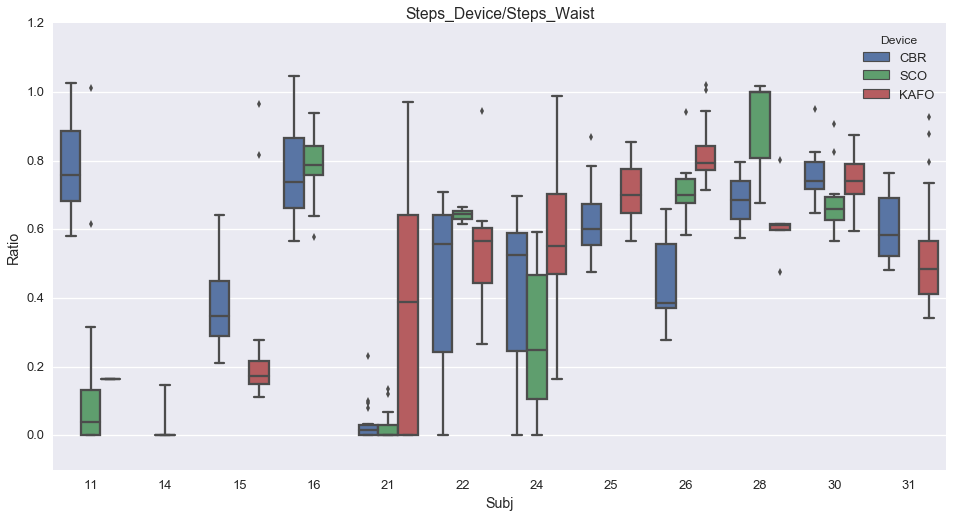

In [37]:
sns.set_context('talk')
fig = plt.figure(figsize=(16,8))
sns.boxplot(data=normsteps[(normsteps.iloc[:,2]<1.05) & (normsteps.iloc[:,3] > 20)],x='Subj',y='Ratio',hue='Device')
plt.ylim([-0.1,1.2])
plt.title('Steps_Device/Steps_Waist')

Note: this is affected by consistency at wearing the waist actigraph. If subjects wore the waist actigraph less than the device, the results will be altered. (need to include only days where weartime_device <= weartime_waist) 

Could be affected by step counts between device and waist


# Waist vs Device wear time (to update)

In [39]:
weartimes.head()

,Days,SubjID,Condition,Wear Time
0,1,CBR11,SCO-Device,86.7
1,2,CBR11,SCO-Device,20.4
2,3,CBR11,SCO-Device,0.0
3,4,CBR11,SCO-Device,0.0
4,5,CBR11,SCO-Device,0.0


In [41]:
weartimes.Condition.unique()

array([u'SCO-Device', u'CBR-Device', u'KAFO-Device'], dtype=object)

In [42]:
weartime = pd.read_csv('./Wear Times_wKAFO.csv',header=[0,1])

In [43]:
weartime.head(4)

,Unnamed: 0_level_0,CBR01,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,CBR02,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 121_level_0,Unnamed: 122_level_0,Unnamed: 123_level_0,Unnamed: 124_level_0,,Unnamed: 126_level_0,,Unnamed: 128_level_0,Unnamed: 129_level_0,Unnamed: 130_level_0
,Days,SCO-Device,SCO-Waist,CBR-Device,CBR-Waist,Unnamed: 5_level_1,SCO-Device,SCO-Waist,CBR-Device,CBR-Waist,...,CBR-Waist,KAFO-Device,KAFO-Waist,Unnamed: 124_level_1,SCO-Device,SCO-Waist,CBR-Device,CBR-Waist,KAFO-Device,KAFO-Waist
0,1,NaN,75.0,NaN,81.9,NaN,NaN,45.1,NaN,35.3,...,100.0,100.0,100.0,NaN,NaN,NaN,93.8,93.5,86.7,86.1
1,2,NaN,32.2,NaN,39.0,NaN,NaN,37.4,NaN,39.7,...,75.4,68.8,67.4,NaN,NaN,NaN,64.9,46.4,55.7,55.1
2,3,NaN,54.9,NaN,1.8,NaN,NaN,26.9,NaN,18.6,...,4.0,68.3,67.2,NaN,NaN,NaN,70.3,49.8,51.6,65.1
3,4,NaN,60.1,NaN,0.0,NaN,NaN,24.5,NaN,17.2,...,0.0,63.2,62.6,NaN,NaN,NaN,59.2,57.9,42.1,49.9


In [44]:
weartime = weartime.drop('Unnamed: 0_level_0',axis=1)
weartime = weartime.T

/Users/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  if __name__ == '__main__':


In [45]:
weartime.T

,CBR01,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,CBR02,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,...,Unnamed: 121_level_0,Unnamed: 122_level_0,Unnamed: 123_level_0,Unnamed: 124_level_0,,Unnamed: 126_level_0,,Unnamed: 128_level_0,Unnamed: 129_level_0,Unnamed: 130_level_0
,SCO-Device,SCO-Waist,CBR-Device,CBR-Waist,Unnamed: 5_level_1,SCO-Device,SCO-Waist,CBR-Device,CBR-Waist,Unnamed: 10_level_1,...,CBR-Waist,KAFO-Device,KAFO-Waist,Unnamed: 124_level_1,SCO-Device,SCO-Waist,CBR-Device,CBR-Waist,KAFO-Device,KAFO-Waist
0,NaN,75,NaN,81.9,NaN,NaN,45.1,NaN,35.3,NaN,...,100,100,100,NaN,NaN,NaN,93.8,93.5,86.7,86.1
1,NaN,32.2,NaN,39,NaN,NaN,37.4,NaN,39.7,NaN,...,75.4,68.8,67.4,NaN,NaN,NaN,64.9,46.4,55.7,55.1
2,NaN,54.9,NaN,1.8,NaN,NaN,26.9,NaN,18.6,NaN,...,4,68.3,67.2,NaN,NaN,NaN,70.3,49.8,51.6,65.1
3,NaN,60.1,NaN,0,NaN,NaN,24.5,NaN,17.2,NaN,...,0,63.2,62.6,NaN,NaN,NaN,59.2,57.9,42.1,49.9
4,NaN,49.8,NaN,0,NaN,NaN,38.9,NaN,31.5,NaN,...,0.4,57.6,56.9,NaN,NaN,NaN,61.3,61,59.4,59
5,NaN,57.2,NaN,12.4,NaN,NaN,26.5,NaN,39.5,NaN,...,62.9,60.1,59.7,NaN,NaN,NaN,66,47.7,58.6,57
6,NaN,63.8,NaN,0,NaN,NaN,37.3,NaN,0,NaN,...,64.7,56.9,55.8,NaN,NaN,NaN,61.8,54.1,60.2,59.3
7,NaN,49,NaN,54.4,NaN,NaN,16.9,NaN,21.2,NaN,...,66.8,63.3,62.3,NaN,NaN,NaN,52.6,42.2,56.7,52.6
8,NaN,55.9,NaN,19.8,NaN,NaN,28.5,NaN,21.5,NaN,...,50.6,71.2,62.4,NaN,NaN,NaN,66.6,55.5,65.1,58.8


In [46]:
SCOw = weartime.iloc[0::2]
SCOw = SCOw.drop(SCOw.columns[0], axis=1) #drop day 0 (lab)
SCOw = SCOw.T
SCOw.columns = SCOw.columns.droplevel(level=1)
SCOw.head(4)

,CBR01,Unnamed: 3_level_0,Unnamed: 5_level_0,Unnamed: 7_level_0,Unnamed: 9_level_0,CBR05,Unnamed: 13_level_0,Unnamed: 15_level_0,Unnamed: 17_level_0,Unnamed: 19_level_0,...,CBR28,Unnamed: 113_level_0,Unnamed: 115_level_0,Unnamed: 117_level_0,Unnamed: 119_level_0,Unnamed: 121_level_0,Unnamed: 123_level_0,,,Unnamed: 129_level_0
1,NaN,NaN,NaN,37.4,39.7,NaN,NaN,NaN,54.7,0,...,0,5.8,8.3,NaN,56.2,75.4,67.4,NaN,64.9,55.7
2,NaN,NaN,NaN,26.9,18.6,NaN,NaN,NaN,61.1,48.5,...,6.5,0,11.9,NaN,52,4,67.2,NaN,70.3,51.6
3,NaN,NaN,NaN,24.5,17.2,NaN,NaN,NaN,58.4,49,...,1.3,0,1.2,NaN,31.3,0,62.6,NaN,59.2,42.1
4,NaN,NaN,NaN,38.9,31.5,NaN,NaN,NaN,45.2,0,...,0,0,0,NaN,69.3,0.4,56.9,NaN,61.3,59.4


In [47]:
CBRw = weartime.iloc[1::2]
CBRw = CBRw.drop(CBRw.columns[0],axis=1) #drop day 0 (lab)
CBRw = CBRw.T
CBRw.columns = CBRw.columns.droplevel(level=1)
CBRw.head(4)

,Unnamed: 2_level_0,Unnamed: 4_level_0,CBR02,Unnamed: 8_level_0,Unnamed: 10_level_0,Unnamed: 12_level_0,Unnamed: 14_level_0,CBR06,Unnamed: 18_level_0,Unnamed: 20_level_0,...,Unnamed: 112_level_0,Unnamed: 114_level_0,Unnamed: 116_level_0,CBR30,Unnamed: 120_level_0,Unnamed: 122_level_0,Unnamed: 124_level_0,Unnamed: 126_level_0,Unnamed: 128_level_0,Unnamed: 130_level_0
1,32.2,39,NaN,NaN,NaN,53.5,42.5,NaN,NaN,NaN,...,0,6.3,20.8,65.5,75.1,68.8,NaN,NaN,46.4,55.1
2,54.9,1.8,NaN,NaN,NaN,44.2,42.2,NaN,NaN,NaN,...,6.5,0.8,22.1,71.2,2.3,68.3,NaN,NaN,49.8,65.1
3,60.1,0,NaN,NaN,NaN,44.4,45.2,NaN,NaN,NaN,...,1.9,1,1.5,31.7,0,63.2,NaN,NaN,57.9,49.9
4,49.8,0,NaN,NaN,NaN,15.1,44.2,NaN,NaN,NaN,...,0.4,3.6,0,69.9,1,57.6,NaN,NaN,61,59


/Users/luca/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


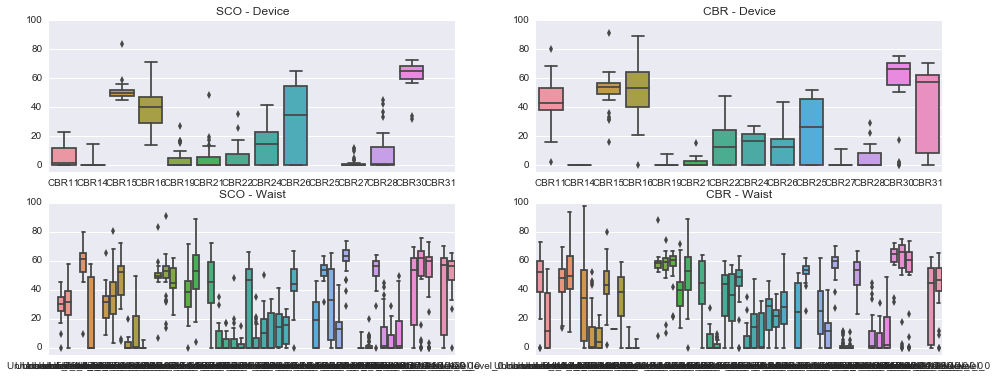

In [48]:
fig = plt.figure(figsize=(16,6))
sns.set_context('notebook')
ax1 = fig.add_subplot(221); plt.ylim(-5,100); ax1.set_title('SCO - Device')
ax2 = fig.add_subplot(222); plt.ylim(-5,100); ax2.set_title('CBR - Device')
ax3 = fig.add_subplot(223); plt.ylim(-5,100); ax3.set_title('SCO - Waist')
ax4 = fig.add_subplot(224); plt.ylim(-5,100); ax4.set_title('CBR - Waist')
sns.boxplot(SCO,ax=ax1)
sns.boxplot(CBR,ax=ax2)
sns.boxplot(SCOw,ax=ax3)
sns.boxplot(CBRw,ax=ax4)

**For most subjects, the daily wear time recorded by the waist Actigraph matches that of the device Actigraph. In some cases (11,21,25 SCO) the median wear time from the Waist device is higher than that of the brace, indicating they have been active without using the brace**

ValueError: cannot convert float NaN to integer

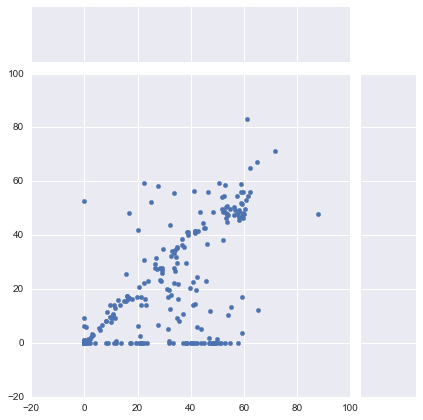

In [133]:
g = sns.jointplot(SCOw,SCO)

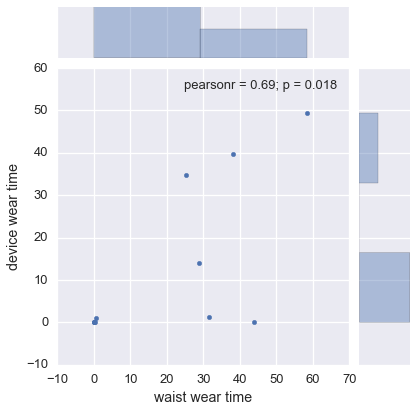

In [134]:
sns.set_context('talk')
medianSCO = SCO.median(axis=0)
medianSCOw = SCOw.median(axis=0)
g = sns.jointplot(medianSCOw,medianSCO)
g.set_axis_labels('waist wear time','device wear time')

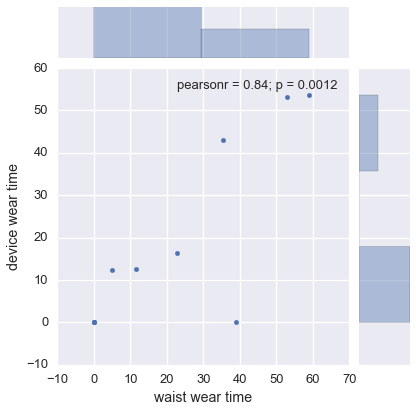

In [135]:
sns.set_context('talk')
medianCBR = CBR.median(axis=0)
medianCBRw = CBRw.median(axis=0)
g = sns.jointplot(medianCBRw,medianCBR)
g.set_axis_labels('waist wear time','device wear time')

ValueError: cannot convert float NaN to integer

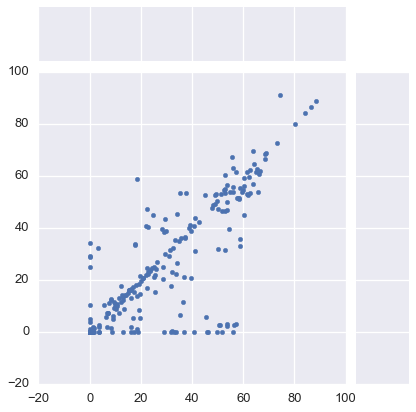

In [136]:
sns.jointplot(CBRw,CBR)

/Users/luca/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


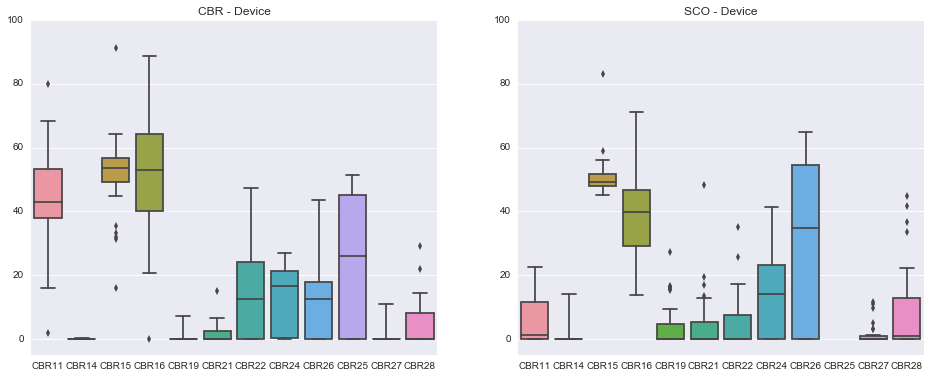

In [16]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121); plt.ylim(-5,100); ax1.set_title('CBR - Device')
ax2 = fig.add_subplot(122); plt.ylim(-5,100); ax2.set_title('SCO - Device')
sns.boxplot(CBR,ax=ax1)
sns.boxplot(SCO,ax=ax2)

**It seems that some people (CBR14,19,21,27) did not use the Cbr at all or very little (median time ~ 0). Others used it moderately (CBR22,24,26, median ~ 15%). CBR11,15,16 used it more (median ~ 40,50% daily wear time).**

**Usage within individuals looks consistent across the 2 braces (SCO and CBR), i.e. if an individual did not use the Cbr he/she also did not use much the SCO. However there are some exceptions, such as CBR11 and CBR22 who seemed to use more the Cbr than the SCO**

# Are there days where usage is preferred?

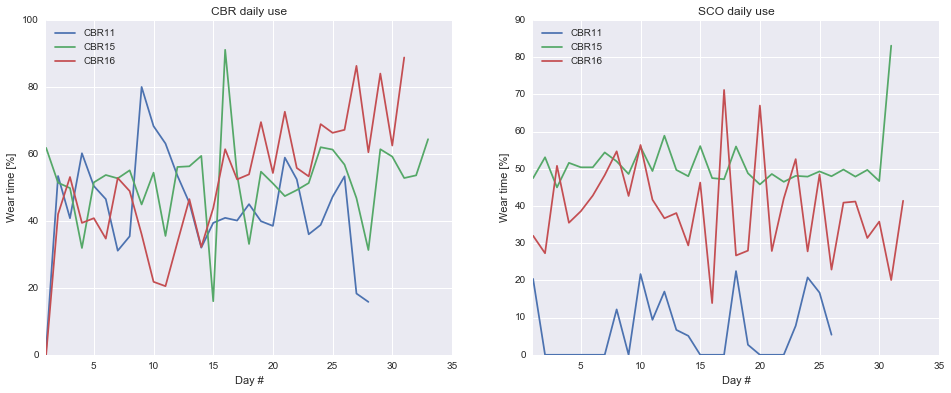

In [17]:
#high usage patients
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121); 
ax2 = fig.add_subplot(122); 
CBR[['CBR11','CBR15','CBR16']].plot(ax=ax1); ax1.set_xlabel('Day #'); ax1.set_ylabel('Wear time [%]'); 
ax1.set_title('CBR daily use')
SCO[['CBR11','CBR15','CBR16']].plot(ax=ax2); ax2.set_xlabel('Day #'); ax2.set_ylabel('Wear time [%]')
ax2.set_title('SCO daily use')

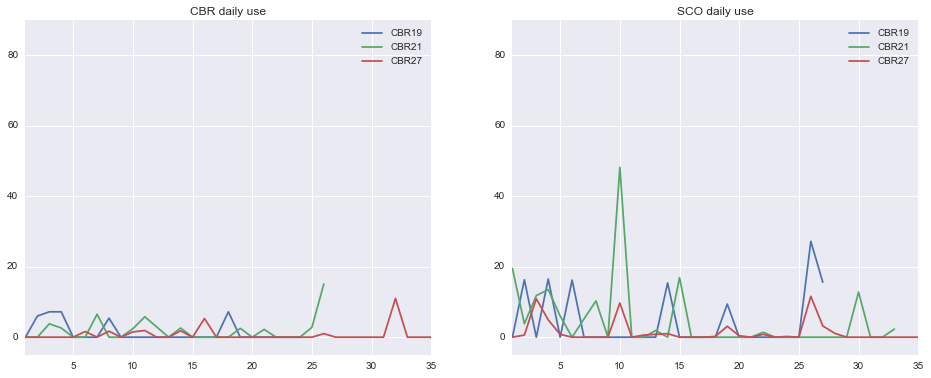

In [18]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121); 
ax2 = fig.add_subplot(122); 
CBR[['CBR19','CBR21','CBR27']].plot(ax=ax1); ax1.set_ylim(-5,90); ax1.set_title('CBR daily use')
SCO[['CBR19','CBR21','CBR27']].plot(ax=ax2); ax2.set_ylim(-5,90); ax2.set_title('SCO daily use')

**People who used the brace less seems to use it intermittently**